<a href="https://colab.research.google.com/github/caballeroarturo/B2-Analisis-de-Datos-con-Python-2020/blob/master/Sesion-08/Reto-03/matriz_de_confusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reto 3: Matriz de Confusión

### 1. Objetivos:
    - Aprender a evaluar un modelo de clasificación binaria utilizando una matriz de confusión
    
---
    
### 2. Desarrollo:

En este Reto vamos a utilizar una matriz de confusión para evaluar el modelo que entrenamos en el Reto anterior. Tu Reto consiste en los siguientes pasos:

1. Copia el código del Reto anterior a este Reto, de manera que tengas un modelo entrenado que sea similar.
2. Obtén tu matriz de confusión utilizando `sklearn.metrics.confusion_matrix`.
3. Usando un mapa de calor (heatmap), grafica tu matriz de confusión de manera que sea muy claro y evidente lo que está pasando. Recuerda modificar tus estilos para que sean agradables a la vista.
4. Utilizando la matriz de confusión, obtén las medidas de Precisión, Exactitud, Sensibilidad y Especificidad. Evalúa tu modelo utilizando estas medidas.

> **Reto extra**: Para un reto extra, obtén las medidas del punto 4 sin utilizar los métodos `sklearn.metrics`. Recuerda que todas tus medidas de evaluación las puedes obtener usando aritmética simple y tu matriz de confusión.

In [25]:
# Las básicas para manejo de datos
import pandas as pd
import numpy as np
# Para gráficas
import seaborn as sns
import matplotlib.pyplot as plt
# Las específicas
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [26]:
path1 = "https://raw.githubusercontent.com/caballeroarturo/B2-Analisis-de-Datos-con-Python-2020/master/"
df = pd.read_csv(path1 + 'Datasets/diabetes-clean.csv', index_col=0)


In [7]:
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


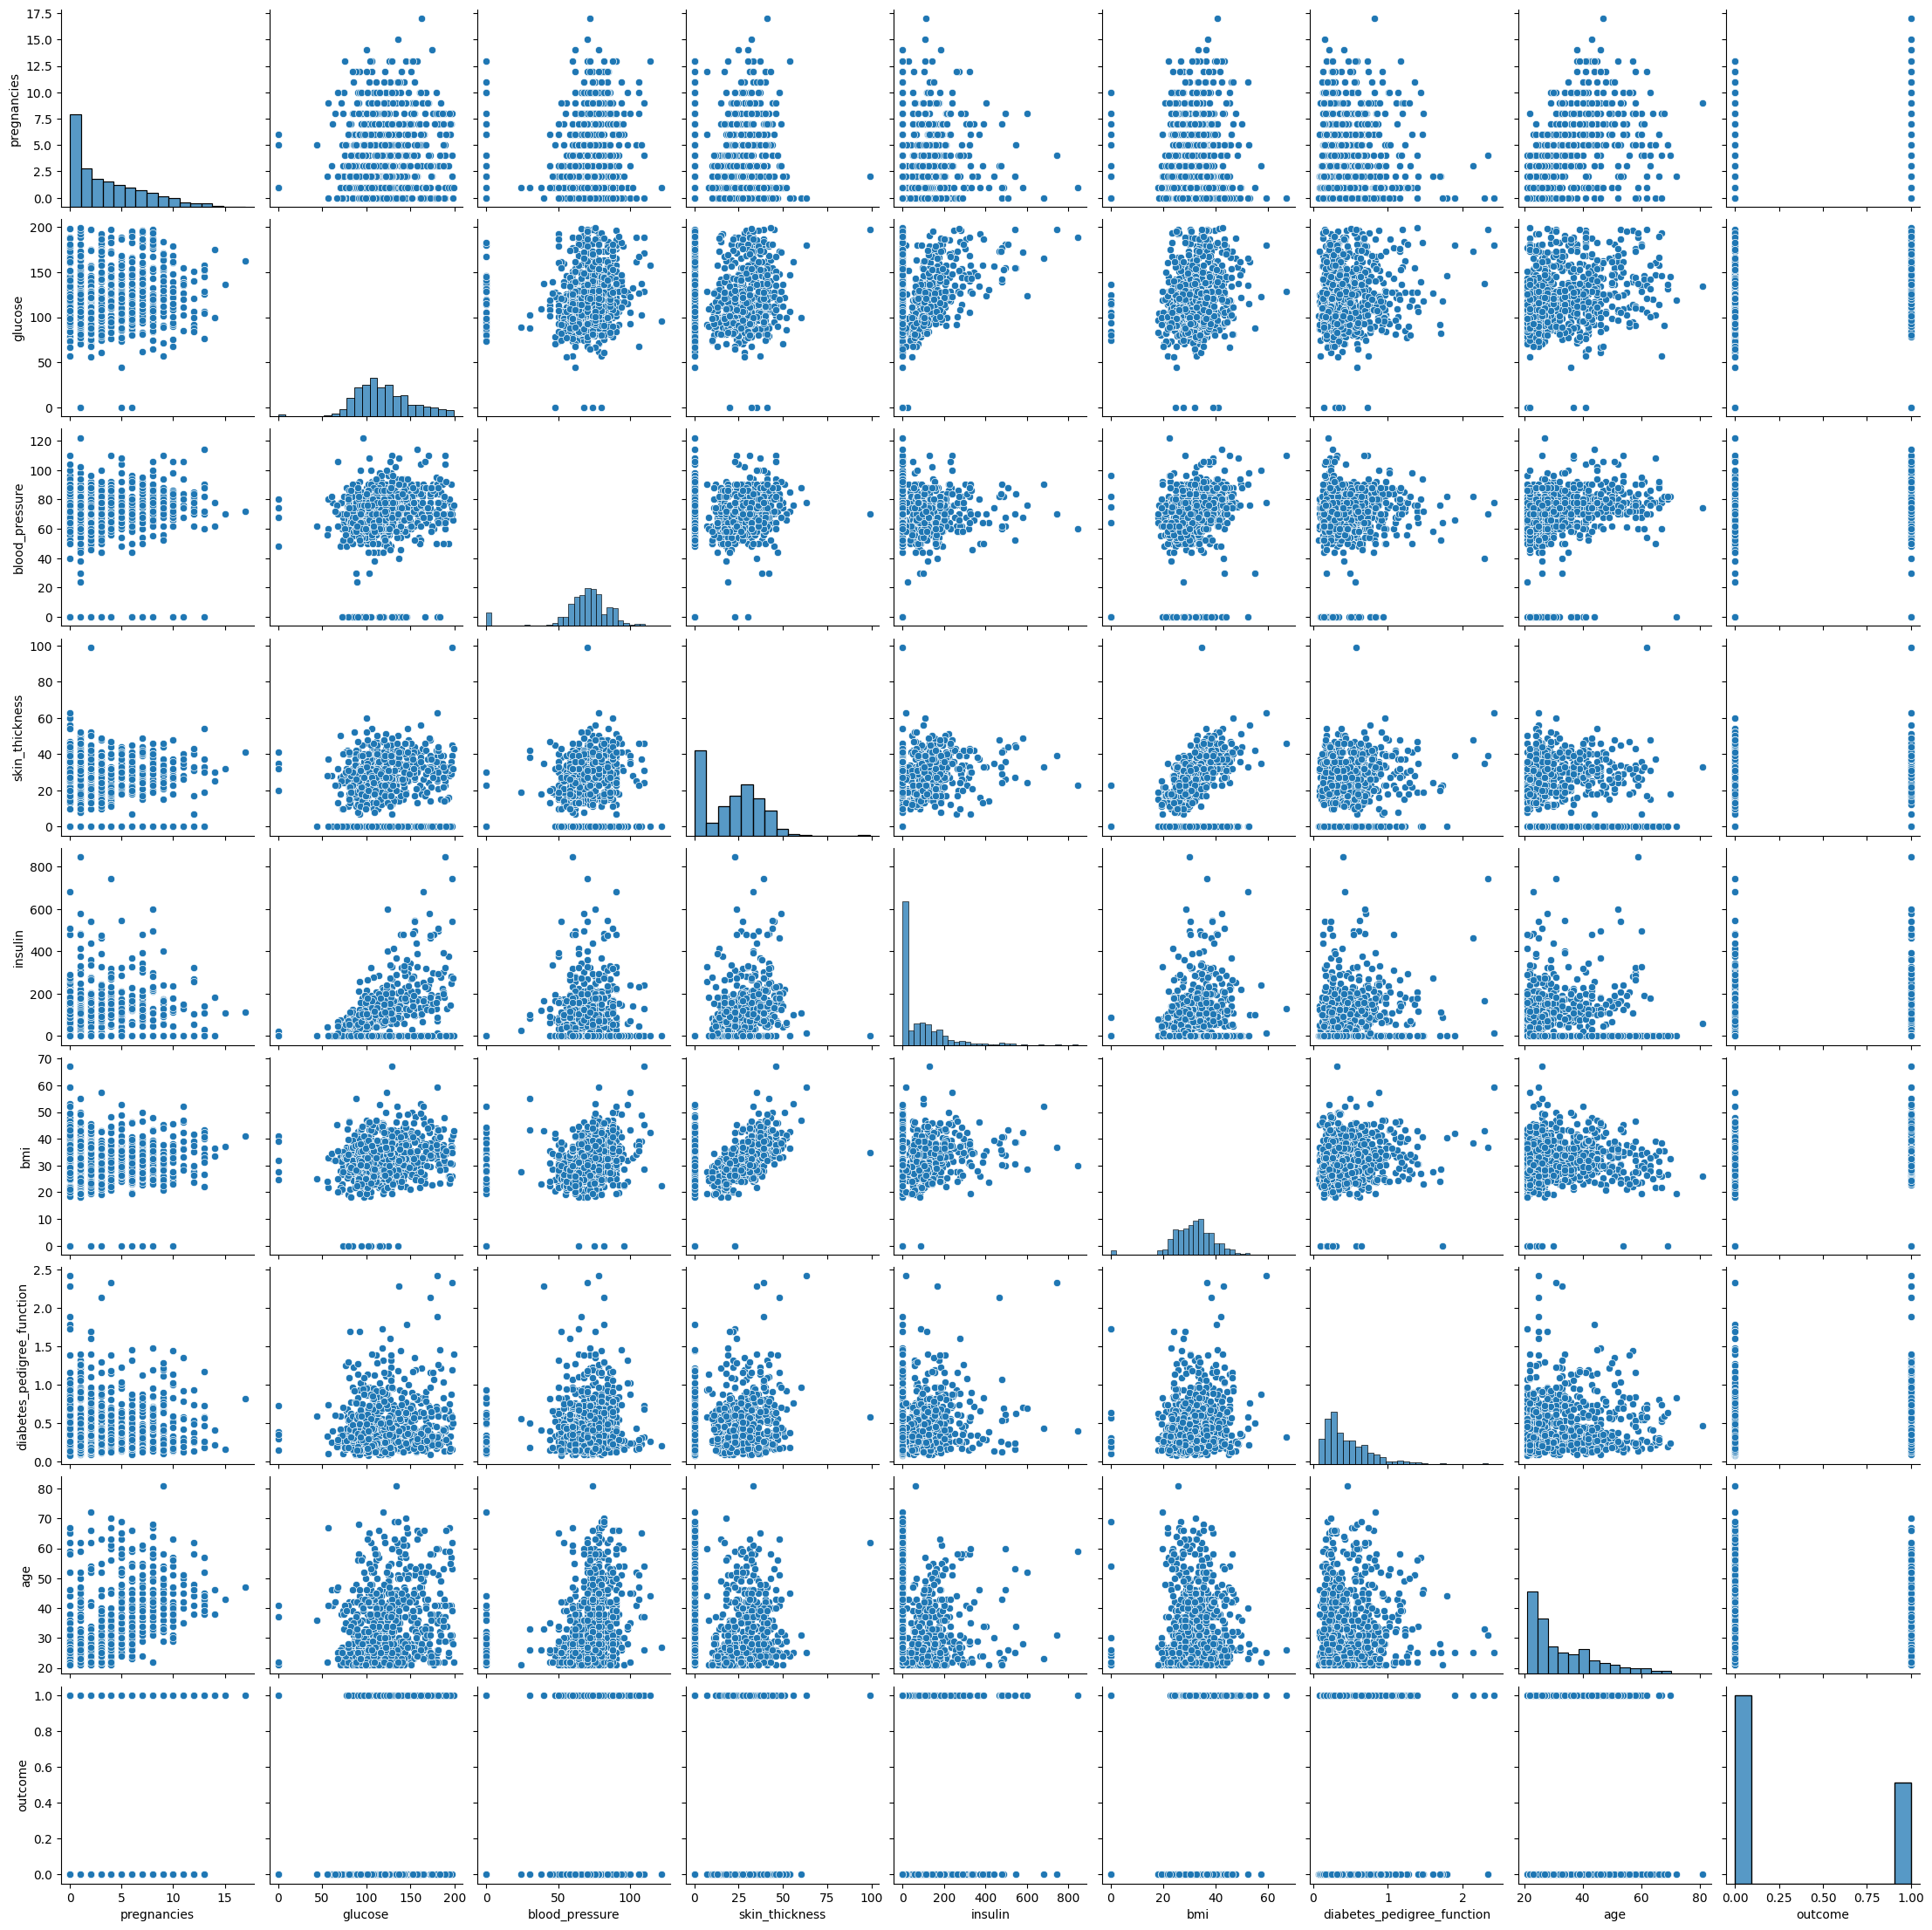

In [10]:
sns.pairplot(df)

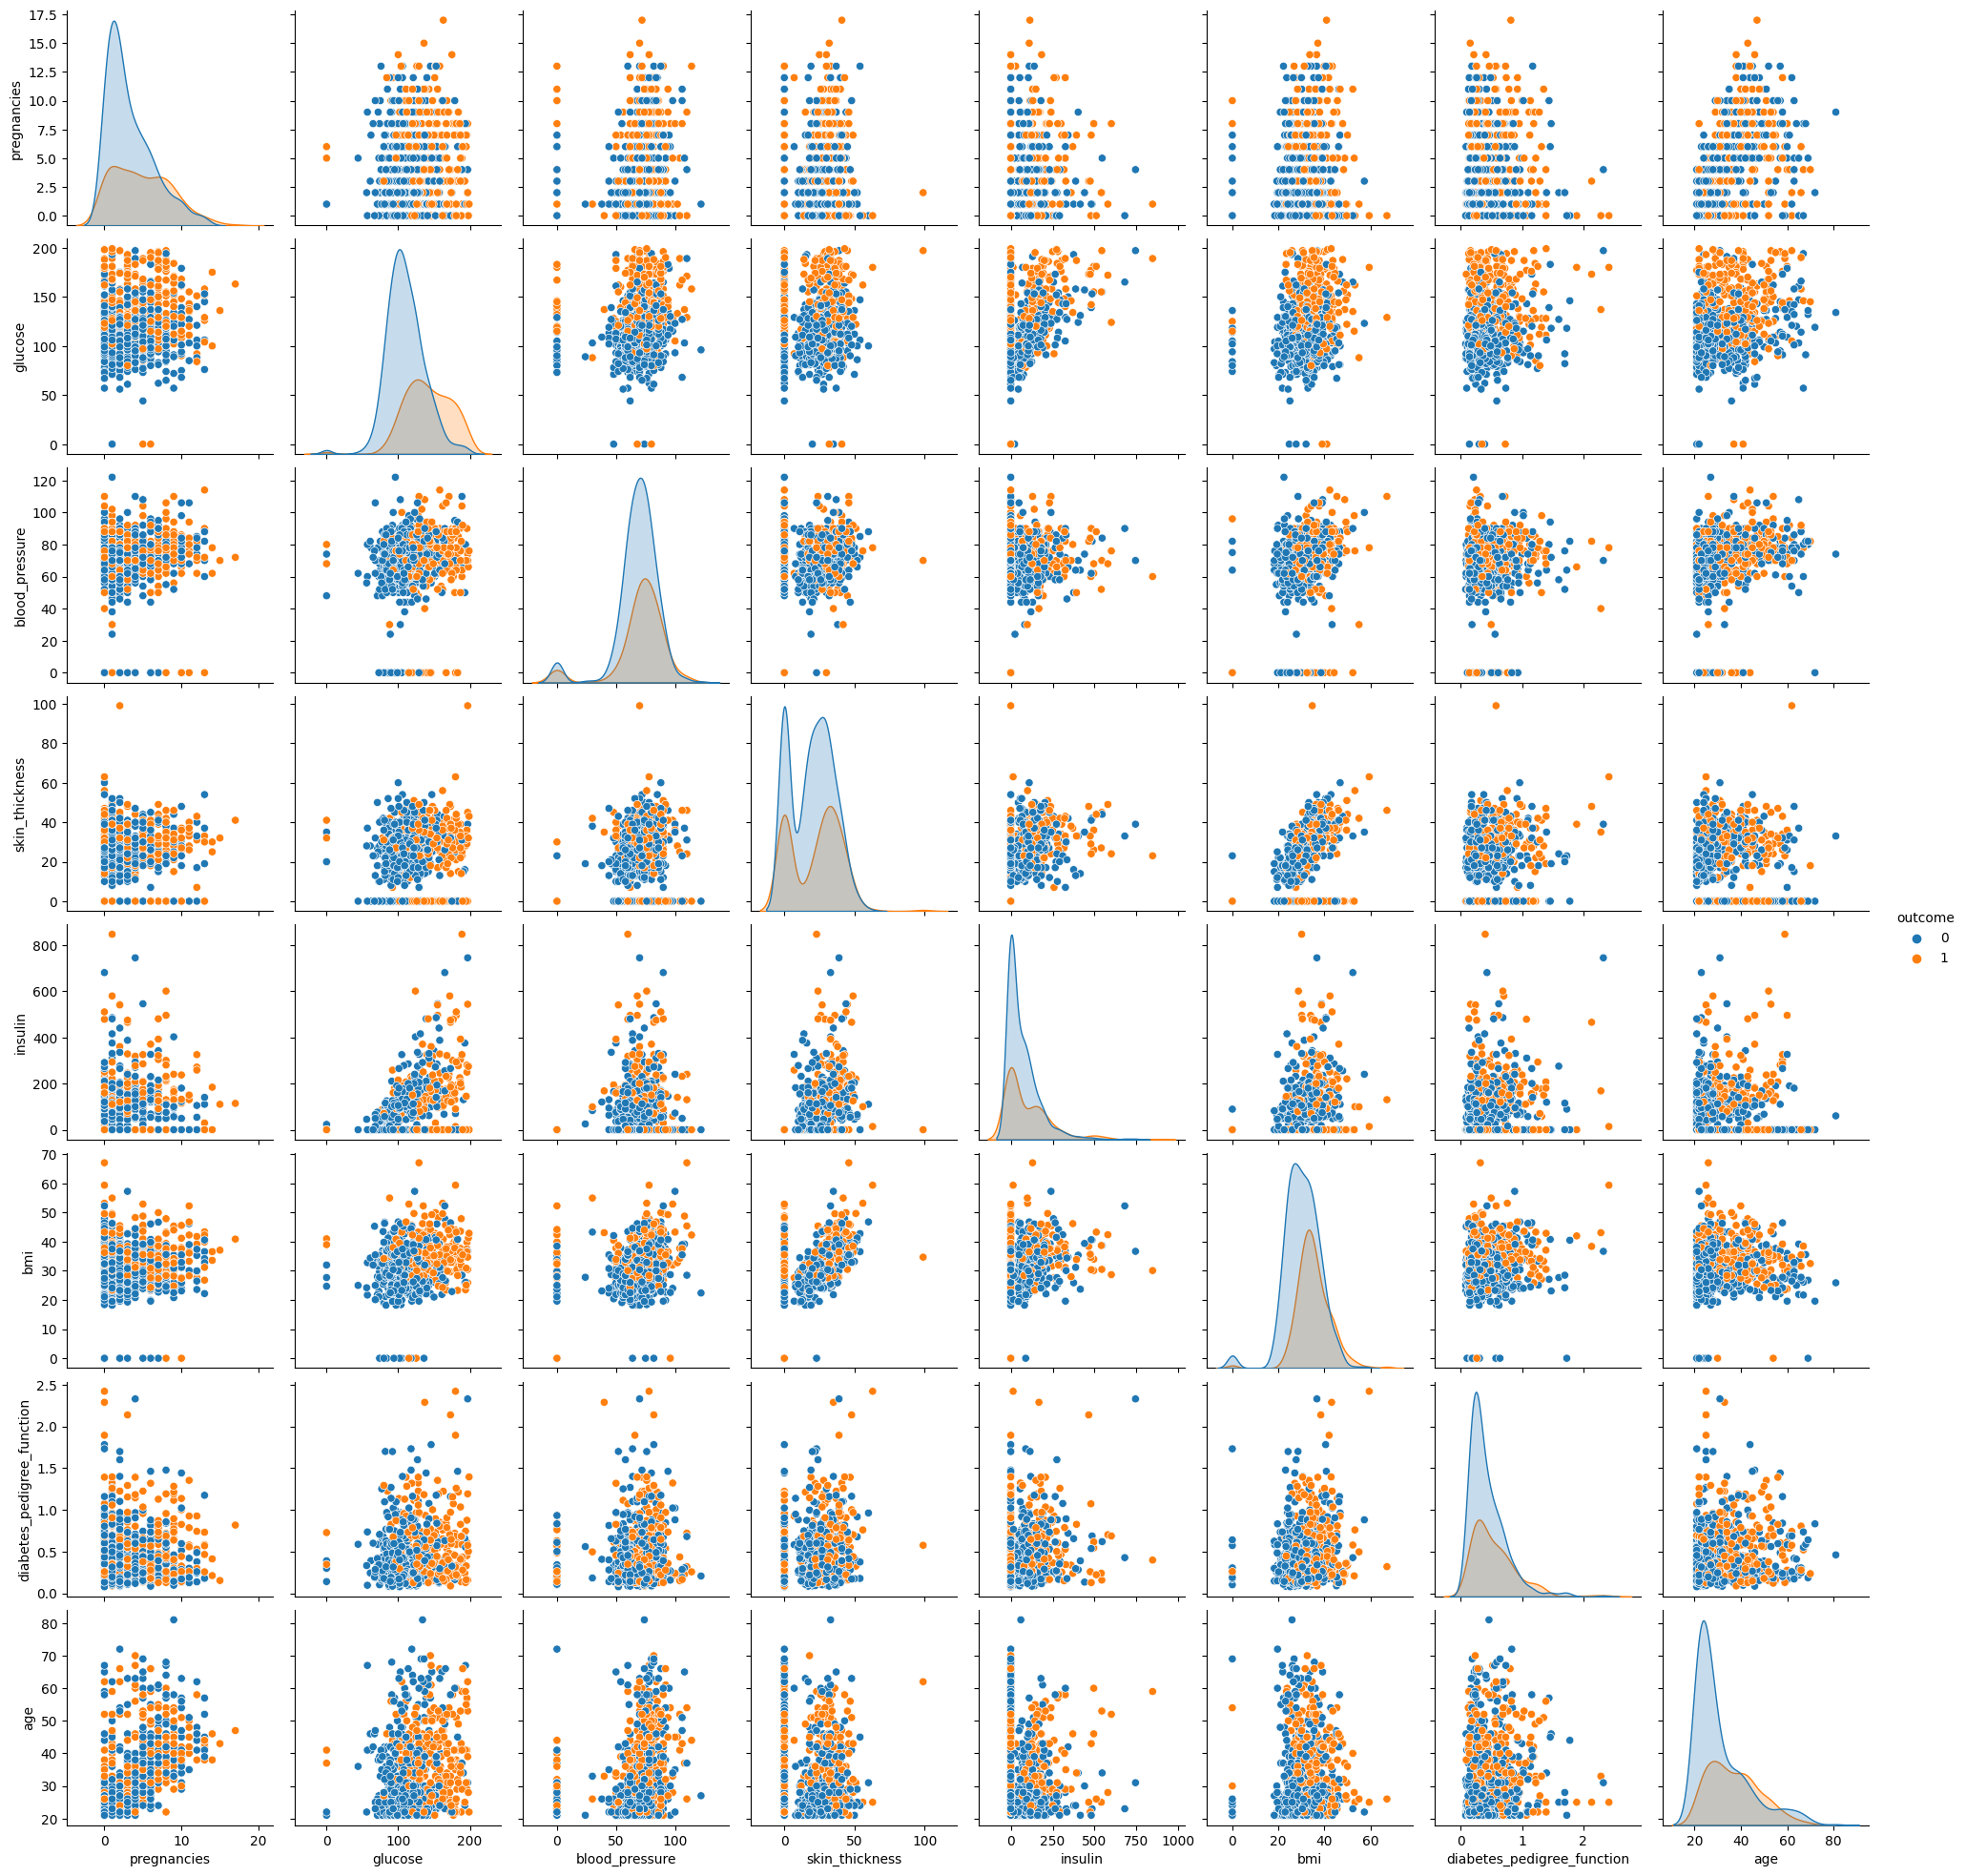

In [12]:
sns.pairplot(df, hue="outcome")

In [27]:
X = df.drop(columns=['outcome'])
y = df['outcome']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [29]:
y_pred = logreg.predict(X_test)

In [37]:
X_test.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
397,0,131,66,40,0,34.3,0.196,22
24,11,143,94,33,146,36.6,0.254,51
190,3,111,62,0,0,22.6,0.142,21
394,4,158,78,0,0,32.9,0.803,31
750,4,136,70,0,0,31.2,1.182,22


In [38]:
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [30]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[141,  19],
       [ 29,  42]])

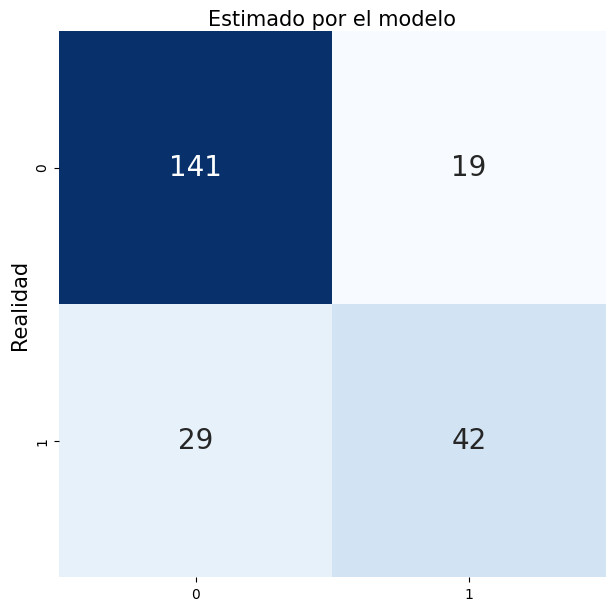

In [31]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [32]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.6885245901639344
Exactitud: 0.7922077922077922
Sensibilidad: 0.5915492957746479
Especificidad: 0.88125


In [33]:
y_pred_proba = logreg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[0.70787345, 0.29212655],
       [0.28835787, 0.71164213],
       [0.89776541, 0.10223459],
       [0.2743164 , 0.7256836 ],
       [0.41719807, 0.58280193],
       [0.79684021, 0.20315979],
       [0.70071325, 0.29928675],
       [0.63689809, 0.36310191],
       [0.90537491, 0.09462509],
       [0.84302891, 0.15697109]])

In [34]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

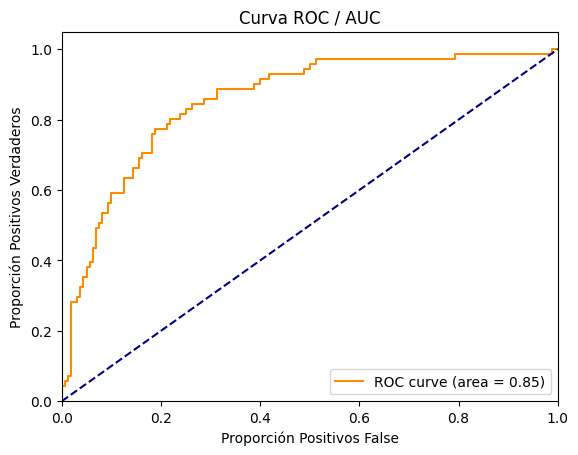

In [35]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

In [41]:
X_test['predichos'] = y_pred
X_test['outcome'] = y_test

In [42]:
X_test

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,predichos,outcome
397,0,131,66,40,0,34.3,0.196,22,0,1
24,11,143,94,33,146,36.6,0.254,51,1,1
190,3,111,62,0,0,22.6,0.142,21,0,0
394,4,158,78,0,0,32.9,0.803,31,1,1
750,4,136,70,0,0,31.2,1.182,22,1,1
...,...,...,...,...,...,...,...,...,...,...
667,10,111,70,27,0,27.5,0.141,40,0,1
473,7,136,90,0,0,29.9,0.210,50,0,0
275,2,100,70,52,57,40.5,0.677,25,0,0
175,8,179,72,42,130,32.7,0.719,36,1,1


In [47]:
dt = X_test.groupby('outcome')[['predichos']].sum()

In [48]:
dt.head

<bound method NDFrame.head of          predichos
outcome           
0               19
1               42>